
@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/XN6fChNqfbs

# K-vecinos más cercanos (KNN)
## Datos de clientes bancarios: crédito

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

clientes = pd.read_csv("creditos.csv")
clientes

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Pagadores VS Deudores

In [2]:
buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Gráfica: Pagadores VS Deudores

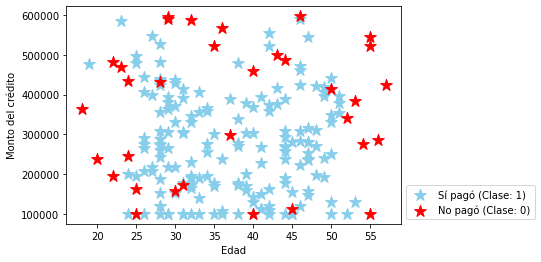

In [3]:
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", 
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Preparación de los datos (Escalar)

In [4]:
datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Creación del Modelo KNN
## Valor de K

In [5]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Nuevo Solicitante (Clasificación)

Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


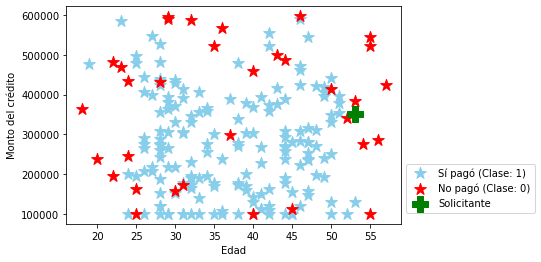

In [6]:
edad = 53
monto = 350000

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, monto]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante") 
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

<BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR><BR>

# Regiones de las clases
### Pagadores vs Deudores

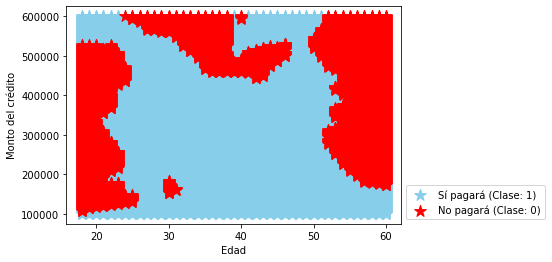

In [7]:
#Datos sinténticos de todos los posibles solicitantes
creditos = np.array([np.arange(100000, 600010, 1000)]*43).reshape(1, -1)
edades = np.array([np.arange(18, 61)]*501).reshape(1, -1)
todos = pd.DataFrame(np.stack((edades, creditos), axis=2)[0],
                     columns=["edad", "credito"])

#Escalar los datos
solicitantes = escalador.transform(todos)

#Predecir todas las clases
clases_resultantes = clasificador.predict(solicitantes)

#Código para graficar
buenos = todos[clases_resultantes==1]
malos = todos[clases_resultantes==0]
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagará (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagará (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()